In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

# Part I Prediction

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv(r'C:\Univ\3rd Semester\Programming for Data Science\Assignment\Assignment 3\daily_weather.csv')

## Daily Weather Data Description (60 points)

<br>
The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)

In [5]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [10]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int64
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [6]:
data.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [4]:
data.shape

(1095, 11)

In [4]:
del data['number']
data = data.dropna()

In [5]:
# Binarize the relative_humidity_3pm to 0 or 1.
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1

In [6]:
clean_data.shape

(1064, 11)

In [8]:
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [6]:
y = clean_data[['high_humidity_label']]
type(y)
y.shape

(1064, 1)

In [7]:
# Use 9am Sensor Signals as Features to Predict Humidity at 3pm
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [8]:
X = clean_data[morning_features]

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)

**Complete the following tasks**:

- Train a logistic regression model (10 points)
- Train a SVM model by tunning both C and gamma, report the best parameters (15 points)
- Train a decision tree model by tuning the proper parameters, report the best parameters (15 points)
- Use the same parameters to train a random forest model (10 points)
- Compare all the above models' performance (10 points)


<div class="alert alert-block alert-info">
<b><font size="4">Metrics Selection</font></b>
</div>

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score,auc
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><font size="4">Logistic Regression</font></b>
</div>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV


In [12]:
parameters={'C': [0.0001,0.01,0.1,1,5,10]}
model = LogisticRegression(random_state=42,n_jobs=4)

In [13]:
logreg = GridSearchCV(model,parameters,cv=5,return_train_score=True)

In [14]:
import warnings
warnings.filterwarnings('ignore')
logreg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=4, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [15]:
logreg.best_params_

{'C': 5}

In [16]:
logreg.best_score_

0.7280701754385965

In [19]:
cm=pd.DataFrame(logreg.cv_results_)
cm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050332,8.466215e-02,0.010404,0.014887,0.0001,{'C': 0.0001},0.720497,0.65000,0.710692,0.754717,...,0.719298,0.039680,4,0.718995,0.733542,0.721440,0.708920,0.708920,0.718364,0.009150
1,0.009603,1.959606e-03,0.002401,0.001960,0.01,{'C': 0.01},0.720497,0.63750,0.710692,0.754717,...,0.711779,0.040057,6,0.725275,0.735110,0.712050,0.690141,0.699531,0.712421,0.016387
2,0.010403,1.961066e-03,0.003200,0.001600,0.1,{'C': 0.1},0.726708,0.61250,0.723270,0.767296,...,0.713033,0.052683,5,0.722135,0.750784,0.721440,0.704225,0.705790,0.720875,0.016740
3,0.012002,2.376544e-06,0.001601,0.001961,1,{'C': 1},0.751553,0.62500,0.716981,0.779874,...,0.724311,0.053562,2,0.715856,0.747649,0.718310,0.704225,0.696401,0.716488,0.017485
4,0.012002,8.449576e-07,0.001601,0.001960,5,{'C': 5},0.757764,0.63125,0.716981,0.779874,...,0.728070,0.052518,1,0.714286,0.747649,0.716745,0.704225,0.694836,0.715548,0.017836
5,0.011200,1.599289e-03,0.003201,0.001601,10,{'C': 10},0.757764,0.63125,0.716981,0.761006,...,0.724311,0.049248,2,0.715856,0.747649,0.716745,0.705790,0.694836,0.716175,0.017631


In [17]:
y_pred= logreg.predict(X_test)
y_prob=logreg.predict_proba(X_test)[:,1]

In [21]:

print('\nLogistic Regression: \n\n\t• The Train score(ROC) of Logistic Rgression is: ',logreg.score(X_train,y_train))

print('\n\t• The Test score(ROC) of Logistic Rgression is: ',logreg.score(X_test,y_test))
print('\n\t• ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print('\n\t• Precision-Recall-AUC SCORE',auc(recall, precision))
print('\n\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Normal','High'],columns=['Normal','High']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )



Logistic Regression: 

	• The Train score(ROC) of Logistic Rgression is:  0.7180451127819549

	• The Test score(ROC) of Logistic Rgression is:  0.7142857142857143

	• ROC-AUC SCORE 0.8001472837478049

	• Precision-Recall-AUC SCORE 0.786238247532603


The Confusion Matrix is plotted below:


,Normal,High
Normal,96,43
High,33,94



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.74      0.69      0.72       139
           1       0.69      0.74      0.71       127

    accuracy                           0.71       266
   macro avg       0.72      0.72      0.71       266
weighted avg       0.72      0.71      0.71       266

   micro avg	   0.71      0.71      0.71


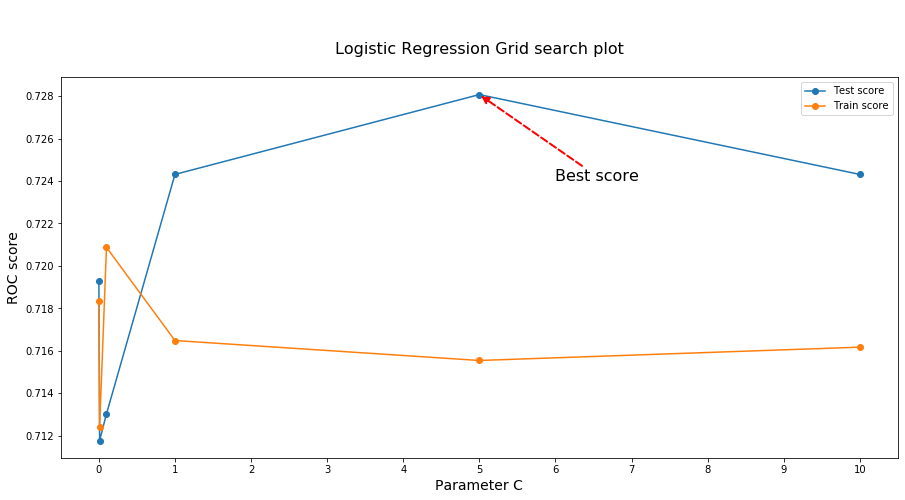

In [119]:
plt.figure(figsize=(15,7))
plt.plot(cm['param_C'],cm['mean_test_score'],label='Test score',marker='o')
plt.plot(cm['param_C'],cm['mean_train_score'],label='Train score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(5, 0.728070),xytext=(6, 0.724), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.title('\n\nLogistic Regression Grid search plot\n',fontsize=16)
plt.xlabel('Parameter C',fontsize=14)
plt.ylabel('ROC score',fontsize=14)
plt.xticks(np.arange(0,11,1));
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
From above we can see that the accuracy score is high when `C = 5` for the logistic regression where the `ROC score` is also high which is of `0.80014`

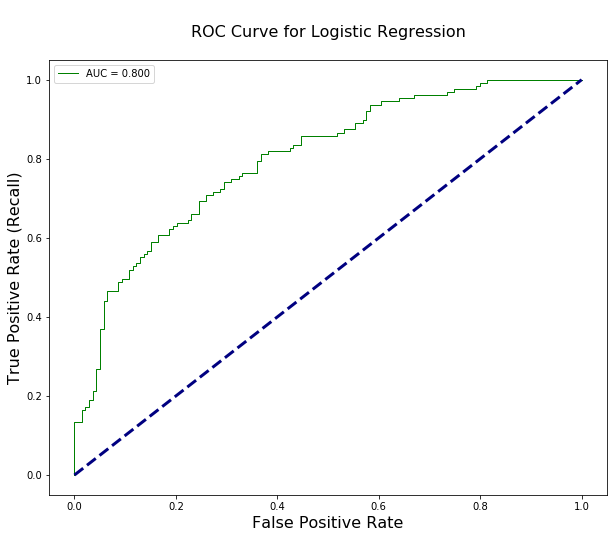

In [18]:
from sklearn.metrics import roc_curve, auc# get false and true positive rates
fprlog, tprlog, thresholdslog = roc_curve(y_test, y_prob)# get area under the curve
roc_auc_log = auc(fprlog, tprlog)# PLOT ROC curve
plt.figure(figsize=(10,8))
plt.plot(fprlog, tprlog, lw=1, color='green', label=f'AUC = {roc_auc_log:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('\nROC Curve for Logistic Regression\n',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

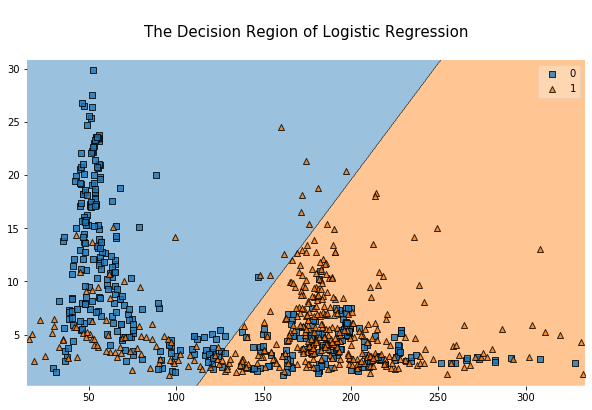

In [119]:
from mlxtend.plotting import plot_decision_regions
X_b = X_train.iloc[:,[2,5]].values
y_b = y_train[:].values.reshape(-1)

lrdr = LogisticRegression(C=5,random_state=42)
lrdr.fit(X_b, y_b) 
plt.figure(figsize=(10,6))
plt.title('\nThe Decision Region of Logistic Regression\n',fontsize=15)
plot_decision_regions(X_b, y_b, clf = lrdr),
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">Support Vector Machines - Radial Bias Kernal</font></b>
</div>

In [19]:
from sklearn.svm import SVC

In [98]:
train_score_array = []
test_score_array = []
auc_score=[]
pr_score=[] #here we will be using simple for loop instead of gridsearch as we wanna see the recall score 
            #for each combination

for i in [0.001,0.1,1,10,15,20]:
    for g in [0.0001,0.001,0.1,1,10]:
        svcrbf = SVC(kernel='rbf', random_state=42,C=i, gamma=g)
        print('\nFor C =',i,'and gamma = ',g)
        svcrbf.fit(X_train,y_train)
        y_pred=svcrbf.predict(X_test)
        y_prob=svcrbf.decision_function(X_test)
        train_score_array.append(svcrbf.score(X_train,y_train).round(5))
        test_score_array.append(svcrbf.score(X_test,y_test).round(5))
        print('Training score without CV:',train_score_array[-1])
        print('Test score -->',test_score_array[-1])
        auc_score.append(roc_auc_score(y_test,y_prob))
        print('ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        pr_score.append(auc(recall, precision))
        print('Precision-Recall-AUC SCORE',auc(recall, precision))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Normal','High'],columns=['Normal','High']))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')



For C = 0.001 and gamma =  0.0001
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.7271851809890669
Precision-Recall-AUC SCORE 0.7028156190741247

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.001 and gamma =  0.001
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.7494476859457316
Precision-Recall-AUC SCORE 0.7133456423543652

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.001 and gamma =  0.1
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.8929077210672407
Precision-Recall-AUC SCORE 0.8530389416492559

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.001 and gamma =  1
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.8601937347759587
Precision-Recall-AUC SCORE 0.8299768264385525

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.001 and gamma =  10
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.6474820143884892
Precision-Recall-AUC SCORE 0.7822222222222222

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.1 and gamma =  0.0001
Training score without CV: 0.70927
Test score --> 0.67293
ROC-AUC SCORE 0.775505579788138
Precision-Recall-AUC SCORE 0.7556861727701546

The Confusion Matrix is plotted below:


,Normal,High
Normal,79,60
High,27,100



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.75      0.57      0.64       139
           1       0.62      0.79      0.70       127

    accuracy                           0.67       266
   macro avg       0.69      0.68      0.67       266
weighted avg       0.69      0.67      0.67       266

   micro avg	   0.67      0.67      0.67
--------------------------------------------------------------------------

For C = 0.1 and gamma =  0.001
Training score without CV: 0.70551
Test score --> 0.67669
ROC-AUC SCORE 0.8151022489095338
Precision-Recall-AUC SCORE 0.8017196514003635

The Confusion Matrix is plotted below:


,Normal,High
Normal,69,70
High,16,111



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.81      0.50      0.62       139
           1       0.61      0.87      0.72       127

    accuracy                           0.68       266
   macro avg       0.71      0.69      0.67       266
weighted avg       0.72      0.68      0.67       266

   micro avg	   0.68      0.68      0.68
--------------------------------------------------------------------------

For C = 0.1 and gamma =  0.1
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.8946354727241829
Precision-Recall-AUC SCORE 0.8554395364026716

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.1 and gamma =  1
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.8657735229139524
Precision-Recall-AUC SCORE 0.8342532467025723

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 0.1 and gamma =  10
Training score without CV: 0.50376
Test score --> 0.47744
ROC-AUC SCORE 0.6618705035971223
Precision-Recall-AUC SCORE 0.7873303167420814

The Confusion Matrix is plotted below:


,Normal,High
Normal,0,139
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.48      1.00      0.65       127

    accuracy                           0.48       266
   macro avg       0.24      0.50      0.32       266
weighted avg       0.23      0.48      0.31       266

   micro avg	   0.48      0.48      0.48
--------------------------------------------------------------------------

For C = 1 and gamma =  0.0001
Training score without CV: 0.73935
Test score --> 0.71429
ROC-AUC SCORE 0.8163484960063444
Precision-Recall-AUC SCORE 0.8050597836252553

The Confusion Matrix is plotted below:


,Normal,High
Normal,93,46
High,30,97



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.76      0.67      0.71       139
           1       0.68      0.76      0.72       127

    accuracy                           0.71       266
   macro avg       0.72      0.72      0.71       266
weighted avg       0.72      0.71      0.71       266

   micro avg	   0.71      0.71      0.71
--------------------------------------------------------------------------

For C = 1 and gamma =  0.001
Training score without CV: 0.8609
Test score --> 0.77444
ROC-AUC SCORE 0.8763949470344984
Precision-Recall-AUC SCORE 0.859560246944739

The Confusion Matrix is plotted below:


,Normal,High
Normal,112,27
High,33,94



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.77      0.81      0.79       139
           1       0.78      0.74      0.76       127

    accuracy                           0.77       266
   macro avg       0.77      0.77      0.77       266
weighted avg       0.77      0.77      0.77       266

   micro avg	   0.77      0.77      0.77
--------------------------------------------------------------------------

For C = 1 and gamma =  0.1
Training score without CV: 1.0
Test score --> 0.78947
ROC-AUC SCORE 0.8977794142638645
Precision-Recall-AUC SCORE 0.8576876039828469

The Confusion Matrix is plotted below:


,Normal,High
Normal,90,49
High,7,120



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.93      0.65      0.76       139
           1       0.71      0.94      0.81       127

    accuracy                           0.79       266
   macro avg       0.82      0.80      0.79       266
weighted avg       0.82      0.79      0.79       266

   micro avg	   0.79      0.79      0.79
--------------------------------------------------------------------------

For C = 1 and gamma =  1
Training score without CV: 1.0
Test score --> 0.60526
ROC-AUC SCORE 0.876451594629808
Precision-Recall-AUC SCORE 0.8444135115056979

The Confusion Matrix is plotted below:


,Normal,High
Normal,34,105
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.24      0.39       139
           1       0.55      1.00      0.71       127

    accuracy                           0.61       266
   macro avg       0.77      0.62      0.55       266
weighted avg       0.78      0.61      0.54       266

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------

For C = 1 and gamma =  10
Training score without CV: 1.0
Test score --> 0.51128
ROC-AUC SCORE 0.6795728771313658
Precision-Recall-AUC SCORE 0.7929259915736213

The Confusion Matrix is plotted below:


,Normal,High
Normal,9,130
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.06      0.12       139
           1       0.49      1.00      0.66       127

    accuracy                           0.51       266
   macro avg       0.75      0.53      0.39       266
weighted avg       0.76      0.51      0.38       266

   micro avg	   0.51      0.51      0.51
--------------------------------------------------------------------------

For C = 10 and gamma =  0.0001
Training score without CV: 0.82707
Test score --> 0.78195
ROC-AUC SCORE 0.8842123151872203
Precision-Recall-AUC SCORE 0.8800299263297626

The Confusion Matrix is plotted below:


,Normal,High
Normal,116,23
High,35,92



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.77      0.83      0.80       139
           1       0.80      0.72      0.76       127

    accuracy                           0.78       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.78      0.78      0.78       266

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------

For C = 10 and gamma =  0.001
Training score without CV: 0.90977
Test score --> 0.83459
ROC-AUC SCORE 0.9027927264487621
Precision-Recall-AUC SCORE 0.8875602444200372

The Confusion Matrix is plotted below:


,Normal,High
Normal,120,19
High,25,102



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.86      0.85       139
           1       0.84      0.80      0.82       127

    accuracy                           0.83       266
   macro avg       0.84      0.83      0.83       266
weighted avg       0.83      0.83      0.83       266

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For C = 10 and gamma =  0.1
Training score without CV: 1.0
Test score --> 0.79699
ROC-AUC SCORE 0.8970996431201496
Precision-Recall-AUC SCORE 0.8591330145212325

The Confusion Matrix is plotted below:


,Normal,High
Normal,93,46
High,8,119



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.92      0.67      0.78       139
           1       0.72      0.94      0.82       127

    accuracy                           0.80       266
   macro avg       0.82      0.80      0.80       266
weighted avg       0.83      0.80      0.79       266

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------

For C = 10 and gamma =  1
Training score without CV: 1.0
Test score --> 0.62782
ROC-AUC SCORE 0.8771313657735229
Precision-Recall-AUC SCORE 0.8457261423372581

The Confusion Matrix is plotted below:


,Normal,High
Normal,40,99
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.29      0.45       139
           1       0.56      1.00      0.72       127

    accuracy                           0.63       266
   macro avg       0.78      0.64      0.58       266
weighted avg       0.79      0.63      0.58       266

   micro avg	   0.63      0.63      0.63
--------------------------------------------------------------------------

For C = 10 and gamma =  10
Training score without CV: 1.0
Test score --> 0.51128
ROC-AUC SCORE 0.6795728771313658
Precision-Recall-AUC SCORE 0.7929259915736213

The Confusion Matrix is plotted below:


,Normal,High
Normal,9,130
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.06      0.12       139
           1       0.49      1.00      0.66       127

    accuracy                           0.51       266
   macro avg       0.75      0.53      0.39       266
weighted avg       0.76      0.51      0.38       266

   micro avg	   0.51      0.51      0.51
--------------------------------------------------------------------------

For C = 15 and gamma =  0.0001
Training score without CV: 0.84962
Test score --> 0.78195
ROC-AUC SCORE 0.8855152098793406
Precision-Recall-AUC SCORE 0.8807950184087486

The Confusion Matrix is plotted below:


,Normal,High
Normal,116,23
High,35,92



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.77      0.83      0.80       139
           1       0.80      0.72      0.76       127

    accuracy                           0.78       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.78      0.78      0.78       266

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------

For C = 15 and gamma =  0.001
Training score without CV: 0.92105
Test score --> 0.82707
ROC-AUC SCORE 0.90443550671274
Precision-Recall-AUC SCORE 0.8875677128704234

The Confusion Matrix is plotted below:


,Normal,High
Normal,120,19
High,27,100



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.84      0.79      0.81       127

    accuracy                           0.83       266
   macro avg       0.83      0.83      0.83       266
weighted avg       0.83      0.83      0.83       266

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------

For C = 15 and gamma =  0.1
Training score without CV: 1.0
Test score --> 0.79699
ROC-AUC SCORE 0.8970996431201496
Precision-Recall-AUC SCORE 0.8591330145212325

The Confusion Matrix is plotted below:


,Normal,High
Normal,93,46
High,8,119



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.92      0.67      0.78       139
           1       0.72      0.94      0.82       127

    accuracy                           0.80       266
   macro avg       0.82      0.80      0.80       266
weighted avg       0.83      0.80      0.79       266

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------

For C = 15 and gamma =  1
Training score without CV: 1.0
Test score --> 0.62782
ROC-AUC SCORE 0.8771313657735229
Precision-Recall-AUC SCORE 0.8457261423372581

The Confusion Matrix is plotted below:


,Normal,High
Normal,40,99
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.29      0.45       139
           1       0.56      1.00      0.72       127

    accuracy                           0.63       266
   macro avg       0.78      0.64      0.58       266
weighted avg       0.79      0.63      0.58       266

   micro avg	   0.63      0.63      0.63
--------------------------------------------------------------------------

For C = 15 and gamma =  10
Training score without CV: 1.0
Test score --> 0.51128
ROC-AUC SCORE 0.6795728771313658
Precision-Recall-AUC SCORE 0.7929259915736213

The Confusion Matrix is plotted below:


,Normal,High
Normal,9,130
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.06      0.12       139
           1       0.49      1.00      0.66       127

    accuracy                           0.51       266
   macro avg       0.75      0.53      0.39       266
weighted avg       0.76      0.51      0.38       266

   micro avg	   0.51      0.51      0.51
--------------------------------------------------------------------------

For C = 20 and gamma =  0.0001
Training score without CV: 0.84962
Test score --> 0.78195
ROC-AUC SCORE 0.8856285050699597
Precision-Recall-AUC SCORE 0.8787753534147447

The Confusion Matrix is plotted below:


,Normal,High
Normal,114,25
High,33,94



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.78      0.82      0.80       139
           1       0.79      0.74      0.76       127

    accuracy                           0.78       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.78      0.78      0.78       266

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------

For C = 20 and gamma =  0.001
Training score without CV: 0.92732
Test score --> 0.81955
ROC-AUC SCORE 0.896901376536566
Precision-Recall-AUC SCORE 0.8779804993439217

The Confusion Matrix is plotted below:


,Normal,High
Normal,120,19
High,29,98



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.84      0.77      0.80       127

    accuracy                           0.82       266
   macro avg       0.82      0.82      0.82       266
weighted avg       0.82      0.82      0.82       266

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For C = 20 and gamma =  0.1
Training score without CV: 1.0
Test score --> 0.79699
ROC-AUC SCORE 0.8970996431201496
Precision-Recall-AUC SCORE 0.8591330145212325

The Confusion Matrix is plotted below:


,Normal,High
Normal,93,46
High,8,119



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.92      0.67      0.78       139
           1       0.72      0.94      0.82       127

    accuracy                           0.80       266
   macro avg       0.82      0.80      0.80       266
weighted avg       0.83      0.80      0.79       266

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------

For C = 20 and gamma =  1
Training score without CV: 1.0
Test score --> 0.62782
ROC-AUC SCORE 0.8771313657735229
Precision-Recall-AUC SCORE 0.8457261423372581

The Confusion Matrix is plotted below:


,Normal,High
Normal,40,99
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.29      0.45       139
           1       0.56      1.00      0.72       127

    accuracy                           0.63       266
   macro avg       0.78      0.64      0.58       266
weighted avg       0.79      0.63      0.58       266

   micro avg	   0.63      0.63      0.63
--------------------------------------------------------------------------

For C = 20 and gamma =  10
Training score without CV: 1.0
Test score --> 0.51128
ROC-AUC SCORE 0.6795728771313658
Precision-Recall-AUC SCORE 0.7929259915736213

The Confusion Matrix is plotted below:


,Normal,High
Normal,9,130
High,0,127



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       1.00      0.06      0.12       139
           1       0.49      1.00      0.66       127

    accuracy                           0.51       266
   macro avg       0.75      0.53      0.39       266
weighted avg       0.76      0.51      0.38       266

   micro avg	   0.51      0.51      0.51
--------------------------------------------------------------------------


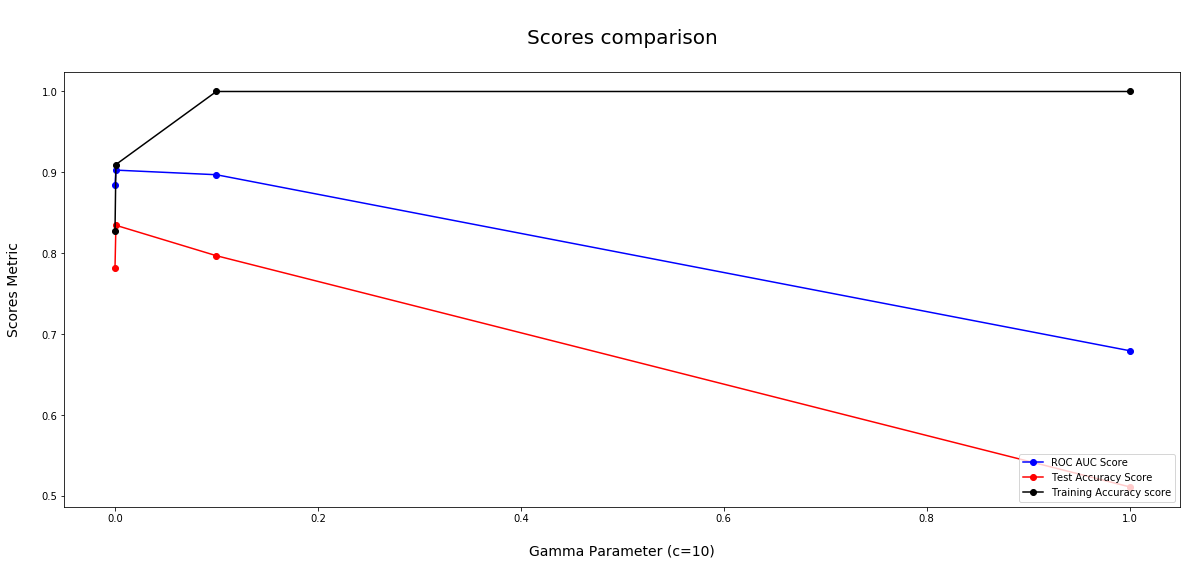

In [101]:
plt.figure(figsize=(20,8))
x_axis = [0.0001,0.001,0.1,1]
#plt.plot(x_axis, [0.8800299,0.88756024,], c = 'g', label = 'Precision-Recall AUC Score',marker='o')
plt.plot(x_axis, [0.884212315,0.90279272,0.897099643,0.67957287], c = 'b', label = 'ROC AUC Score',marker='o')
plt.plot(x_axis, [0.78195,0.83459,0.79699,0.51128], c = 'r', label = 'Test Accuracy Score',marker='o')
plt.plot(x_axis, [0.827,0.9097,1.0,1], c = 'k', label = 'Training Accuracy score',marker='o')
#plt.annotate("Best Recall & PR-AUC score",fontsize=16,xy=(1, 0.78),xytext=(3, 0.82), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='lower right')
plt.title('\nScores comparison\n',fontsize=20)
plt.xlabel('\nGamma Parameter (c=10)',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
#plt.xticks(np.arange(0, 21, 1))
plt.show()

Let's Visualize closely

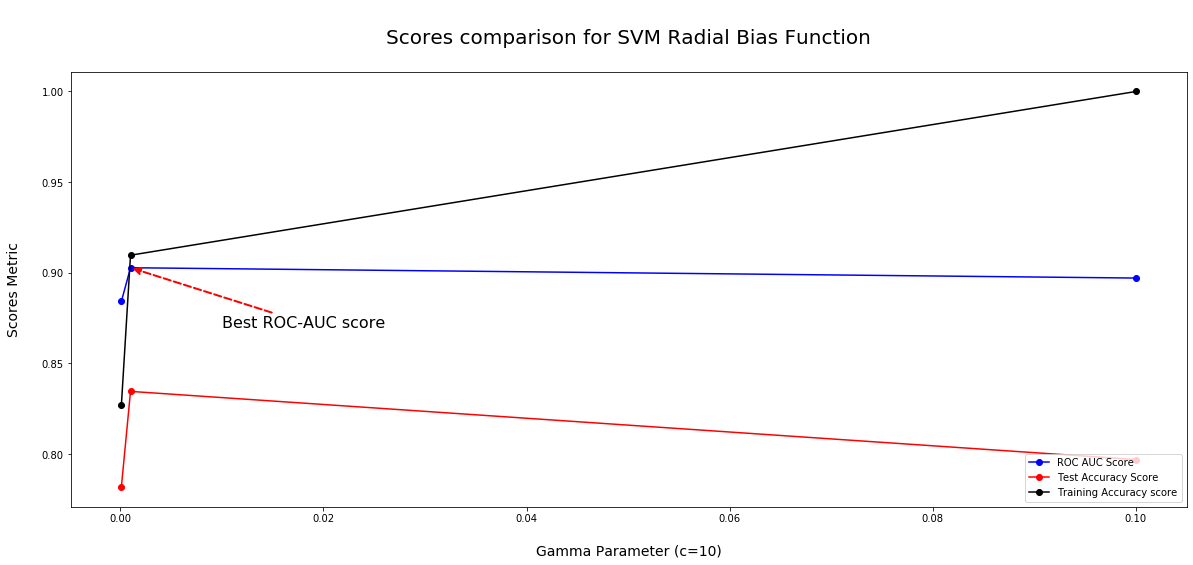

In [105]:
plt.figure(figsize=(20,8))
x_axis = [0.0001,0.001,0.1]
#plt.plot(x_axis, [0.8800299,0.88756024,], c = 'g', label = 'Precision-Recall AUC Score',marker='o')
plt.plot(x_axis, [0.884212315,0.90279272,0.897099643], c = 'b', label = 'ROC AUC Score',marker='o')
plt.plot(x_axis, [0.78195,0.83459,0.79699], c = 'r', label = 'Test Accuracy Score',marker='o')
plt.plot(x_axis, [0.827,0.9097,1.0], c = 'k', label = 'Training Accuracy score',marker='o')
plt.annotate("Best ROC-AUC score",fontsize=16,xy=(0.001, 0.902792),xytext=(0.01, 0.87), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='lower right')
plt.title('\nScores comparison for SVM Radial Bias Function\n',fontsize=20)
plt.xlabel('\nGamma Parameter (c=10)',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
#plt.xticks(np.arange(0, 21, 1))
plt.show()

<div class="alert alert-block alert-success">

From above we can see that the best parameters are `C = 10` and `gamma =  0.001` which yields the best results of `accuracy score as 0.834`
and `ROC score of 0.90279` and `fl_score of 0.83`

In [21]:
import warnings
warnings.filterwarnings('ignore')
svcrbf = SVC(kernel='rbf', random_state=42,C=10, gamma=0.001)
print('\nFor C =',10,'and gamma = ',0.001)
svcrbf.fit(X_train,y_train)
y_pred=svcrbf.predict(X_test)
y_prob=svcrbf.decision_function(X_test)
print('Training accuracy score:',svcrbf.score(X_train,y_train).round(5))
print('Test accuracy score -->',svcrbf.score(X_test,y_test).round(5))
print('ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print('Precision-Recall-AUC SCORE',auc(recall, precision))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Normal','High'],columns=['Normal','High']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')



For C = 10 and gamma =  0.001
Training accuracy score: 0.90977
Test accuracy score --> 0.83459
ROC-AUC SCORE 0.9027927264487621
Precision-Recall-AUC SCORE 0.8875602444200372

The Confusion Matrix is plotted below:


,Normal,High
Normal,120,19
High,25,102



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.86      0.85       139
           1       0.84      0.80      0.82       127

    accuracy                           0.83       266
   macro avg       0.84      0.83      0.83       266
weighted avg       0.83      0.83      0.83       266

   micro avg	   0.83      0.83      0.83
--------------------------------------------------------------------------


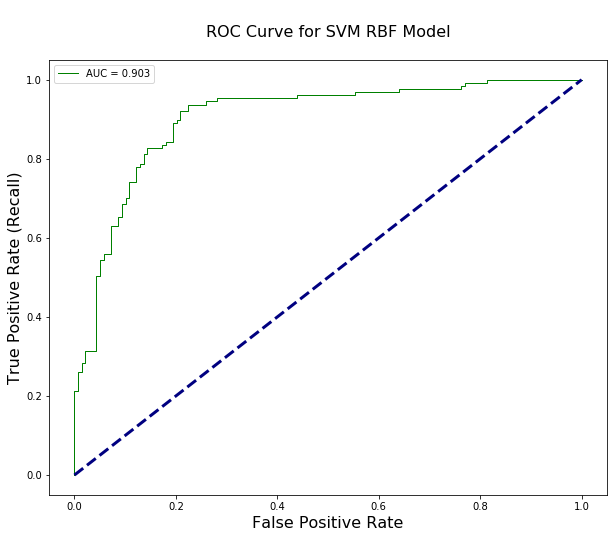

In [22]:
from sklearn.metrics import roc_curve, auc# get false and true positive rates
fprbf, tprbf, thresholdsrbf = roc_curve(y_test, y_prob)# get area under the curve
roc_auc_rbf = auc(fprbf, tprbf)# PLOT ROC curve
plt.figure(figsize=(10,8))
plt.plot(fprbf, tprbf, lw=1, color='green', label=f'AUC = {roc_auc_rbf:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('\nROC Curve for SVM RBF Model\n',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

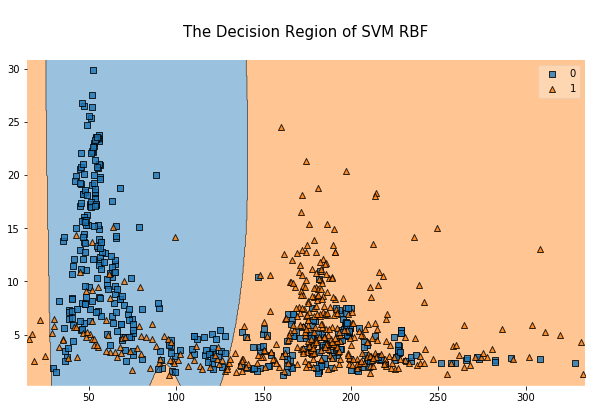

In [17]:
from mlxtend.plotting import plot_decision_regions
X_b = X_train.iloc[:,[2,5]].values
y_b = y_train[:].values.reshape(-1)

svcrbf = SVC(kernel='rbf', random_state=42,C=10, gamma=0.001)
svcrbf.fit(X_b, y_b) 
plt.figure(figsize=(10,6))
plt.title('\nThe Decision Region of SVM RBF\n',fontsize=15)
plot_decision_regions(X_b, y_b, clf = svcrbf),
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">Decision Tree Classifier</font></b>
</div>

In [23]:
from sklearn.tree import DecisionTreeClassifier
parameters={'max_depth':[3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]}
dtree = DecisionTreeClassifier(random_state=999)

In [24]:
dtreegscv=GridSearchCV(dtree,parameters,cv=5,return_train_score=True)

In [25]:
dtreegscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 8, 10, 12, 15, 18, 20, 22, 24, 26,
                                       28, 30, 50, 100]},

In [26]:
dtreegscv.best_params_

{'max_depth': 15}

In [17]:
dtreegscv.best_score_

0.7819548872180451

In [18]:
cm=pd.DataFrame(dtreegscv.cv_results_)
cm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009600,0.001357,0.002605,0.000489,3,{'max_depth': 3},0.782609,0.7000,0.805031,0.716981,...,0.750627,0.039199,15,0.806907,0.815047,0.801252,0.801252,0.815336,0.807959,0.006257
1,0.011803,0.001469,0.002800,0.000747,5,{'max_depth': 5},0.807453,0.7375,0.817610,0.742138,...,0.773183,0.033273,14,0.872841,0.884013,0.887324,0.868545,0.874804,0.877505,0.007044
2,0.011800,0.000400,0.002586,0.000508,8,{'max_depth': 8},0.782609,0.7250,0.842767,0.761006,...,0.776942,0.038257,13,0.963893,0.962382,0.954617,0.929577,0.946792,0.951452,0.012526
3,0.011203,0.001468,0.002402,0.000491,10,{'max_depth': 10},0.782609,0.7500,0.830189,0.748428,...,0.779449,0.029826,11,0.981162,0.993730,0.990610,0.967136,0.979656,0.982459,0.009358
4,0.012003,0.001097,0.002201,0.000400,12,{'max_depth': 12},0.776398,0.7750,0.823899,0.754717,...,0.779449,0.023470,11,0.984301,1.000000,0.998435,0.989045,0.998435,0.994043,0.006228
5,0.010802,0.000749,0.002200,0.000400,15,{'max_depth': 15},0.776398,0.7750,0.830189,0.754717,...,0.781955,0.025323,1,0.998430,1.000000,1.000000,1.000000,1.000000,0.999686,0.000628
6,0.012035,0.001082,0.002385,0.000472,18,{'max_depth': 18},0.776398,0.7750,0.830189,0.754717,...,0.781955,0.025323,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.012024,0.001128,0.002350,0.000498,20,{'max_depth': 20},0.776398,0.7750,0.830189,0.754717,...,0.781955,0.025323,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.011190,0.000967,0.002011,0.000040,22,{'max_depth': 22},0.776398,0.7750,0.830189,0.754717,...,0.781955,0.025323,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.010601,0.000489,0.002202,0.000400,24,{'max_depth': 24},0.776398,0.7750,0.830189,0.754717,...,0.781955,0.025323,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


<div class="alert alert-block alert-success">
From above we can see that the ROC AUC score and Test score is maximum at depth of 15

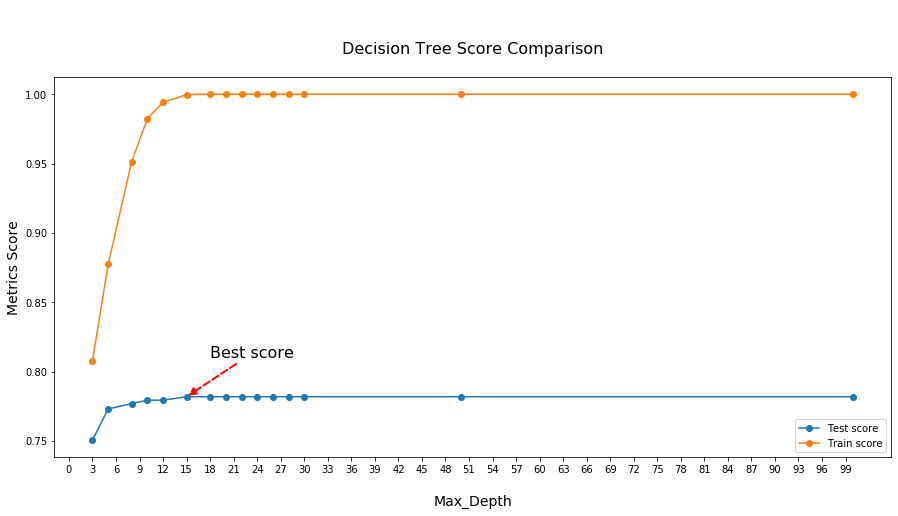

In [19]:
plt.figure(figsize=(15,7))
x=[3,5,8,10,12,15,18,20,22,24,26,28,30,50,100]
plt.plot(x,cm['mean_test_score'],label='Test score',marker='o')
plt.plot(x,cm['mean_train_score'],label='Train score',marker='o')
#plt.plot(x,roc_array,label='ROC_AUC score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(15, 0.781955),xytext=(18, 0.81), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.title('\n\nDecision Tree Score Comparison\n',fontsize=16)
plt.xlabel('\nMax_Depth',fontsize=14)
plt.ylabel('Metrics Score',fontsize=14)
plt.xticks(np.arange(0,100,3));
plt.legend()
plt.show()

Training with the best parameter

In [27]:
dtree = DecisionTreeClassifier(max_depth=15,random_state=999)
print('\nFor maxdepth =',15)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_prob=dtree.predict_proba(X_test)[:,1]
print('Training score:',dtree.score(X_train, y_train))
print('Test score -->',dtree.score(X_test, y_test))
print('ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print('Precision-Recall-AUC SCORE',auc(recall, precision))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Normal','High'],columns=['Normal','High']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')



For maxdepth = 15
Training score: 1.0
Test score --> 0.7969924812030075
ROC-AUC SCORE 0.796238599671444
Precision-Recall-AUC SCORE 0.8383953584749274

The Confusion Matrix is plotted below:


,Normal,High
Normal,113,26
High,28,99



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.80      0.81      0.81       139
           1       0.79      0.78      0.79       127

    accuracy                           0.80       266
   macro avg       0.80      0.80      0.80       266
weighted avg       0.80      0.80      0.80       266

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------


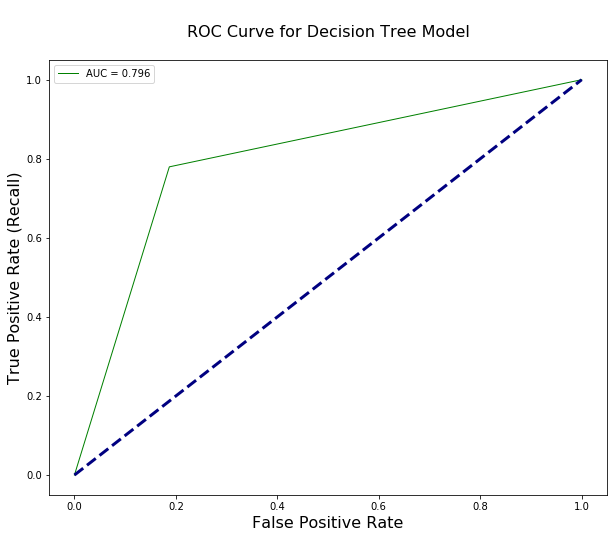

In [28]:
from sklearn.metrics import roc_curve, auc# get false and true positive rates
fprd, tprd, thresholdd = roc_curve(y_test, y_prob)# get area under the curve
roc_auc_tree = auc(fprd, tprd)# PLOT ROC curve
plt.figure(figsize=(10,8))
plt.plot(fprd, tprd, lw=1, color='green', label=f'AUC = {roc_auc_tree:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('\nROC Curve for Decision Tree Model\n',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

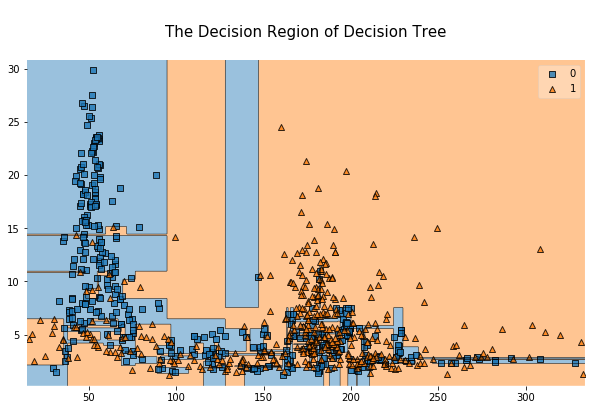

In [22]:
from mlxtend.plotting import plot_decision_regions
X_b = X_train.iloc[:,[2,5]].values
y_b = y_train[:].values.reshape(-1)
dtreet = DecisionTreeClassifier(max_depth=15,random_state=999)
dtreet.fit(X_b, y_b) 
plt.figure(figsize=(10,6))
plt.title('\nThe Decision Region of Decision Tree\n',fontsize=15)
plot_decision_regions(X_b, y_b, clf = dtreet),
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">Random Forest Classifier</font></b>
</div>

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
parameters= {'n_estimators':[100,200,300,400,500]}

In [31]:
rftree=RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=15)#using the max_depth as 15 from the decision tree above

In [32]:
rftgscv= GridSearchCV(rftree,parameters,n_jobs=-1,cv=5,return_train_score=True)

In [33]:
rftgscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_esti

In [34]:
rftgscv.best_params_

{'n_estimators': 400}

In [35]:
rftgscv.best_score_

0.8483709273182958

In [36]:
y_pred= rftgscv.predict(X_test)
y_prob=rftgscv.predict_proba(X_test)[:,1]

In [30]:
cm=pd.DataFrame(rftgscv.cv_results_)
cm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.588467,0.066002,0.189453,0.086371,100,{'n_estimators': 100},0.832298,0.81250,0.880503,0.811321,...,0.842105,0.029718,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.901178,0.194672,0.133234,0.022378,200,{'n_estimators': 200},0.844720,0.81875,0.886792,0.798742,...,0.843358,0.031852,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.451366,0.035228,0.238861,0.036195,300,{'n_estimators': 300},0.844720,0.81875,0.874214,0.805031,...,0.843358,0.028176,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.926886,0.121298,0.300876,0.047549,400,{'n_estimators': 400},0.850932,0.81875,0.874214,0.817610,...,0.848371,0.026544,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,2.489609,0.261570,0.289013,0.087643,500,{'n_estimators': 500},0.844720,0.81875,0.874214,0.811321,...,0.844612,0.026535,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


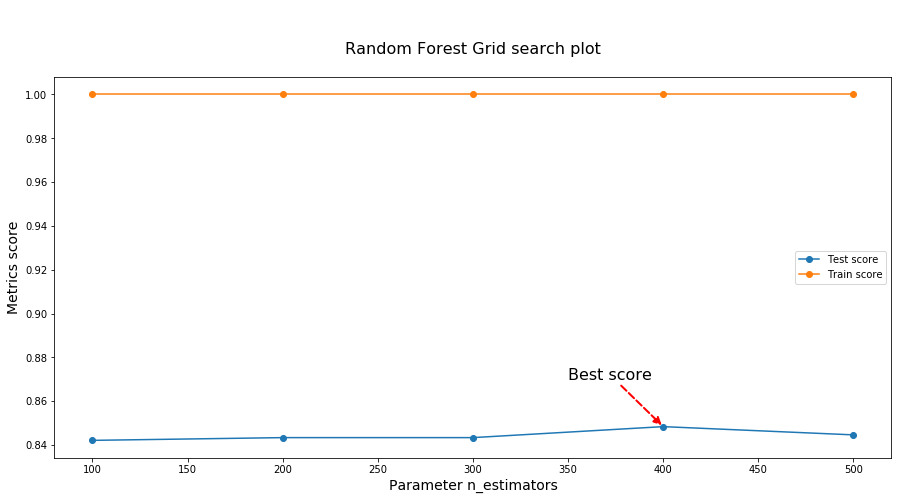

In [32]:
plt.figure(figsize=(15,7))
plt.plot(cm['param_n_estimators'],cm['mean_test_score'],label='Test score',marker='o')
plt.plot(cm['param_n_estimators'],cm['mean_train_score'],label='Train score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(400, 0.848371	),xytext=(350, 0.87), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.title('\n\nRandom Forest Grid search plot\n',fontsize=16)
plt.xlabel('Parameter n_estimators',fontsize=14)
plt.ylabel('Metrics score',fontsize=14)
#plt.xticks(np.arange(0,11,1));
plt.legend()
plt.show()

In [27]:
print('\nRandom Forest Classifier: \n\n\t• The Train score(ROC)  is: ',rftgscv.score(X_train,y_train))
print('\n\t• The Test score(ROC) is: ',rftgscv.score(X_test,y_test))
print('\n\t• ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print('\n\t• Precision-Recall-AUC SCORE',auc(recall, precision))
print('\n\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Normal','High'],columns=['Normal','High']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )



Random Forest Classifier: 

	• The Train score(ROC)  is:  1.0

	• The Test score(ROC) is:  0.8458646616541353

	• ROC-AUC SCORE 0.9455616609074946

	• Precision-Recall-AUC SCORE 0.9429188378710256


The Confusion Matrix is plotted below:


,Normal,High
Normal,117,22
High,19,108



The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       139
           1       0.83      0.85      0.84       127

    accuracy                           0.85       266
   macro avg       0.85      0.85      0.85       266
weighted avg       0.85      0.85      0.85       266

   micro avg	   0.85      0.85      0.85


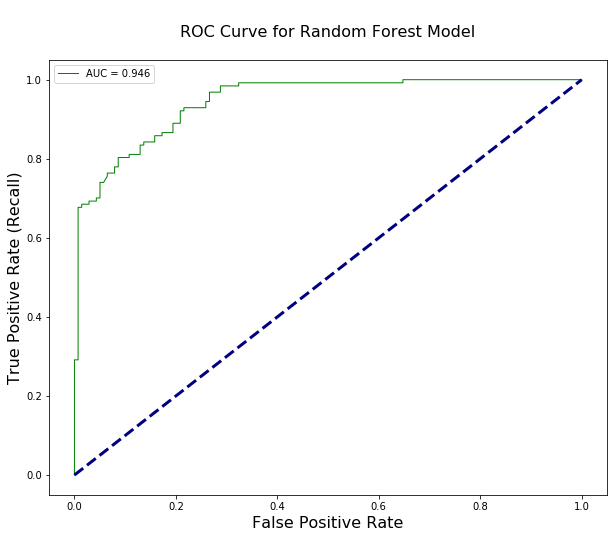

In [37]:
from sklearn.metrics import roc_curve, auc# get false and true positive rates
fprrand, tprrand, thresholdsrand = roc_curve(y_test, y_prob)# get area under the curve
roc_auc_rand = auc(fprrand, tprrand)# PLOT ROC curve
plt.figure(figsize=(10,8))
plt.plot(fprrand, tprrand, lw=1, color='green', label=f'AUC = {roc_auc_rand:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('\nROC Curve for Random Forest Model\n',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

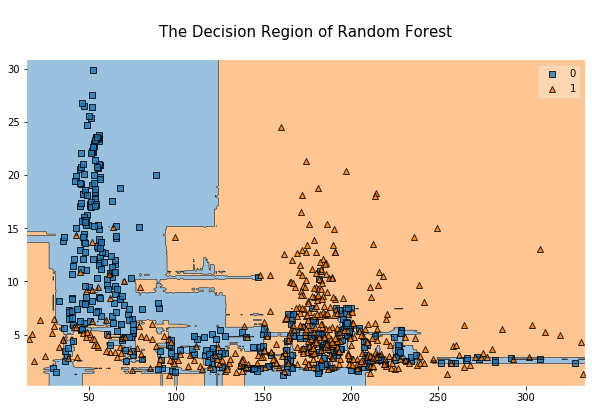

In [29]:
from mlxtend.plotting import plot_decision_regions
X_b = X_train.iloc[:,[2,5]].values
y_b = y_train[:].values.reshape(-1)
rftreet=RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=42,max_depth=18)
rftreet.fit(X_b, y_b) 
plt.figure(figsize=(10,6))
plt.title('\nThe Decision Region of Random Forest\n',fontsize=15)
plot_decision_regions(X_b, y_b, clf = rftreet),
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">Comparison of Models</font></b>
</div>

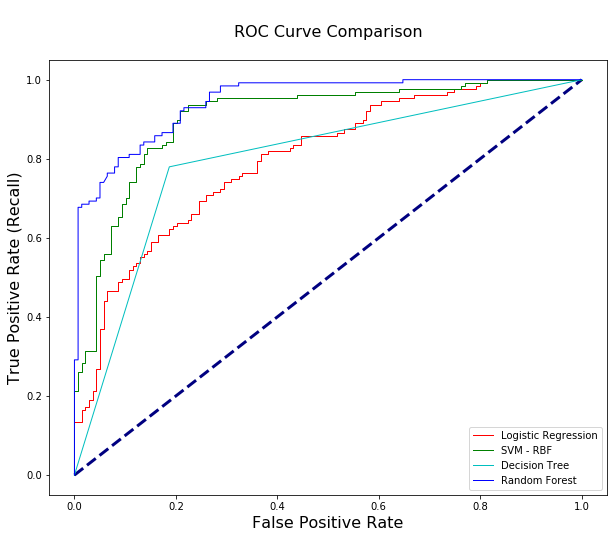

In [41]:
plt.figure(figsize=(10,8))
plt.plot(fprlog, tprlog, lw=1, color='r',label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.plot(fprbf, tprbf, lw=1, color='green',label='SVM - RBF')
plt.plot(fprd, tprd, lw=1, color='c',label='Decision Tree')
plt.plot(fprrand, tprrand, lw=1, color='b',label='Random Forest')
plt.title('\nROC Curve Comparison\n',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

In [49]:
dict={'Accuracy score':[0.71428,0.83459,0.79699,0.84586],
      'ROC - AUC':[0.80014,0.90279,0.79623,0.94556],
      'PR -AUC':[0.78623,0.88756,0.83839,0.94291],
      'Recall':[0.72,0.83,0.80,0.85],
      'f1 - score':[0.71,0.83,0.80,0.85]}
model_results= pd.DataFrame(dict,index=['Logistic Regression','SVM - RBF','Decision Tree','Random Forest'])
print('\n\n Metrics Summary of all Models(sorted based on ROC -AUC) :')
display(model_results.sort_values(by=['ROC - AUC'],ascending=False))



 Metrics Summary of all Models(sorted based on ROC -AUC) :


,Accuracy score,ROC - AUC,PR -AUC,Recall,f1 - score
Random Forest,0.84586,0.94556,0.94291,0.85,0.85
SVM - RBF,0.83459,0.90279,0.88756,0.83,0.83
Logistic Regression,0.71428,0.80014,0.78623,0.72,0.71
Decision Tree,0.79699,0.79623,0.83839,0.80,0.80


<div class="alert alert-block alert-success">

From the above resutls we can see that the `'Random Forest Classifier'` outperform every models and scores the best in all metrics criteria

# Part II Clustering (40 points)

In [4]:
data = pd.read_csv(R'C:\Univ\3rd Semester\Programming for Data Science\Assignment\Assignment 3\minute_weather.csv')

## Weather data

The **minute weather dataset** comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file **minute_weather.csv**, which is a comma-separated file.

As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [5]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [6]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [7]:
data.shape

(1587257, 13)

In [8]:
#Lots of rows, so let us sample down by taking every 10th row.
sampled_df = data[(data['rowID']%10) == 0]
sampled_df.shape

(158726, 13)

In [9]:
sampled_df = sampled_df.dropna()

In [10]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [11]:
select_df = sampled_df[features]

In [12]:
#Standardize the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48457779,  0.03247287, -0.1905634 , ...,  0.03826302,
        -0.66172102, -0.34710411],
       [-1.51734678,  0.1237468 , -0.65236961, ..., -0.44847591,
        -0.372321  ,  0.40839584],
       [-1.51734678,  0.06289752, -0.74682997, ..., -0.6539879 ,
        -0.41366386,  0.39313322],
       ...,
       [-0.30489432,  1.15818466,  1.90855574, ...,  2.03930084,
        -0.70306388,  0.01538324],
       [-0.30489432,  1.12776002,  2.06598967, ..., -1.67073143,
        -0.74440674, -0.04948292],
       [-0.30489432,  1.09733538, -1.6389556 , ..., -1.55175081,
        -0.62037816, -0.05711423]])

**Complete the following tasks**:

- Train a KMeans clustering model. (20 points)
- Visualize the differences of feature "air_temp" among different clusters. Any visualiztion types could be accepted.  (20 points)

Note: you should select a value of k, based on which you are able to observe differences among clusters.


In [16]:
from sklearn.cluster import KMeans 
wcss=[]   #within cluster sum of squares
for k in range(1,20):
    kmc=KMeans(n_clusters=k,random_state=42)
    kmc.fit(X)
    wcss.append(kmc.inertia_)

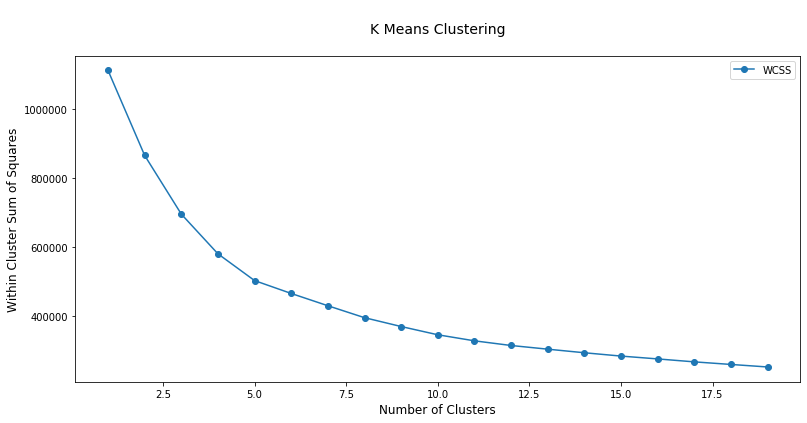

In [17]:
plt.figure(figsize=(13,6))
plt.plot(range(1,20),wcss, label='WCSS',marker='o')
plt.title('\nK Means Clustering\n',fontsize=14)

plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Within Cluster Sum of Squares',fontsize=12)
#plt.annotate("Optimal cluster",fontsize=16,xy=(5,1),xytext=(6.5, 1.5), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))

plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">Let's visualize closely

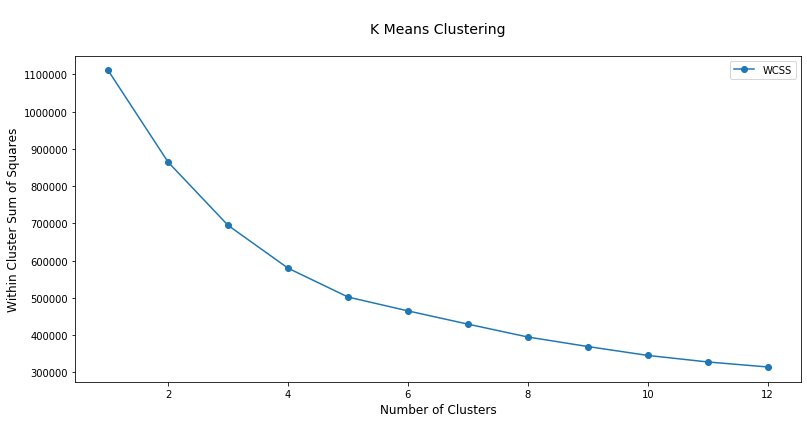

In [20]:
plt.figure(figsize=(13,6))
plt.plot(range(1,13),wcss[:12], label='WCSS',marker='o')
plt.title('\nK Means Clustering\n',fontsize=14)

plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Within Cluster Sum of Squares',fontsize=12)
#plt.annotate("Optimal cluster",fontsize=16,xy=(5,1),xytext=(6.5, 1.5), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))

plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">From above we can select the optimal cluster as 10 and let's train the model for the same below:

In [21]:
from sklearn.cluster import KMeans 
kmc=KMeans(n_clusters=10,random_state=42)
kmc.fit(X)
y_kmeans=kmc.fit_predict(X) # predicting the labels

In [22]:
y_kmeans

array([6, 5, 5, ..., 4, 8, 2])

In [33]:
tot=pd.concat([pd.DataFrame(X,columns=features),pd.DataFrame(y_kmeans,columns=['y_kmeans'])],axis=1)

In [35]:
tot.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,y_kmeans
0,-1.484578,0.032473,-0.190563,-0.765557,0.038263,-0.661721,-0.347104,6
1,-1.517347,0.123747,-0.652370,-0.376758,-0.448476,-0.372321,0.408396,5
2,-1.517347,0.062898,-0.746830,-0.376758,-0.653988,-0.413664,0.393133,5
3,-1.517347,0.184596,-0.851786,-0.085159,-0.816234,-0.206950,0.374055,2
4,-1.550116,0.154171,-0.631378,-0.765557,-0.480925,-0.785750,0.145116,6


In [36]:
tot['y_kmeans'].value_counts()

3    25929
6    24682
1    20718
2    19291
0    14326
9    13572
4    13444
5    12101
7     7966
8     6650
Name: y_kmeans, dtype: int64

In [37]:
tot['y_kmeans']= tot['y_kmeans']+1  #changing from '0 to 9' to '1 to 10'

In [38]:
tot['y_kmeans'].value_counts()

4     25929
7     24682
2     20718
3     19291
1     14326
10    13572
5     13444
6     12101
8      7966
9      6650
Name: y_kmeans, dtype: int64

In [39]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158679 entries, 0 to 158678
Data columns (total 8 columns):
air_pressure          158679 non-null float64
air_temp              158679 non-null float64
avg_wind_direction    158679 non-null float64
avg_wind_speed        158679 non-null float64
max_wind_direction    158679 non-null float64
max_wind_speed        158679 non-null float64
relative_humidity     158679 non-null float64
y_kmeans              158679 non-null int32
dtypes: float64(7), int32(1)
memory usage: 9.1 MB


In [40]:
tot['y_kmeans']= tot['y_kmeans'].astype('object')

<div class="alert alert-block alert-success">Let's check whether we can able to differentiate the cluster based on any one of the features

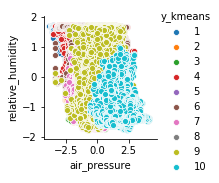

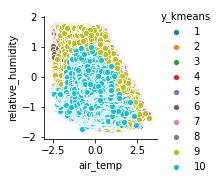

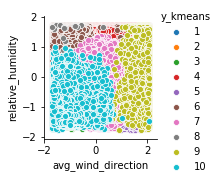

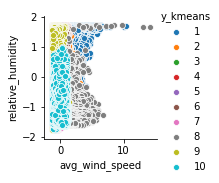

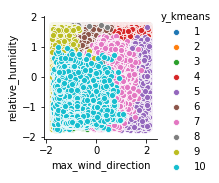

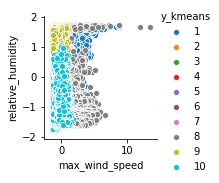

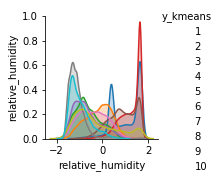

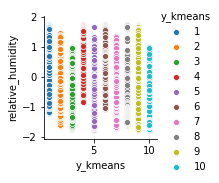

In [59]:
import seaborn as sns
for col in tot.columns:
    sns.pairplot(x_vars=col,y_vars='relative_humidity',hue='y_kmeans',data=tot)
    plt.show()

<div class="alert alert-block alert-success">From above we can see that we can not able to differentiate between clusters by any features

<div class="alert alert-block alert-success">
    By using the below table we can analyze the different features of each cluster in detail

In [60]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(tot.groupby(['y_kmeans']).describe().transpose())

y_kmeans                            1             2             3   \
air_pressure       count  14326.000000  20718.000000  19291.000000   
                   mean      -1.138372     -0.218568     -0.181245   
                   std        0.814843      0.722029      0.642285   
                   min       -3.876714     -2.631492     -2.467647   
                   25%       -1.550116     -0.730891     -0.599815   
                   50%       -0.993043     -0.239356     -0.141049   
                   75%       -0.730891      0.284947      0.284947   
                   max        2.120011      2.349393      1.661245   
air_temp           count  14326.000000  20718.000000  19291.000000   
                   mean      -0.979559      0.594693      0.859388   
                   std        0.615279      0.660263      0.586334   
                   min       -2.492772     -1.777793     -1.138876   
                   25%       -1.473547      0.138959      0.473630   
                   50%       -1.001965      0.595329      0.869151   
                   75%       -0.408684      1.051698      1.264671   
                   max        1.462431      2.572931      3.135786   
avg_wind_direction count  14326.000000  20718.000000  19291.000000   
                   mean       0.427101      0.404189     -1.307004   
                   std        0.303210      0.241062      0.288625   
                   min       -1.691434     -1.229627     -1.701929   
                   25%        0.229260      0.239756     -1.534000   
                   50%        0.491650      0.428677     -1.376566   
                   75%        0.575615      0.554624     -1.124671   
                   max        2.065990      1.961034      0.397190   
avg_wind_speed     count  14326.000000  20718.000000  19291.000000   
                   mean       1.686265      0.667641     -0.580018   
                   std        0.747261      0.481050      0.409065   
                   min       -0.182359     -0.425358     -1.300155   
                   25%        1.178437      0.303640     -0.862756   
                   50%        1.761635      0.595239     -0.619757   
                   75%        1.858834      0.984037     -0.376758   
                   max       10.363805      3.122430      1.324236   
max_wind_direction count  14326.000000  20718.000000  19291.000000   
                   mean       0.522678      0.513315     -1.164821   
                   std        0.321509      0.268912      0.325704   
                   min       -1.768079     -1.681548     -1.757263   
                   25%        0.319490      0.319490     -1.411137   
                   50%        0.568268      0.535818     -1.238075   
                   75%        0.643983      0.665615     -0.978481   
                   max        2.104199      2.115016      0.330306   
max_wind_speed     count  14326.000000  20718.000000  19291.000000   
                   mean       1.655401      0.609268     -0.595559   
                   std        0.722046      0.447913      0.415002   
                   min        0.165136     -0.206950     -1.364550   
                   25%        1.157365      0.247822     -0.909778   
                   50%        1.694822      0.537222     -0.661721   
                   75%        1.818851      0.867965     -0.372321   
                   max        8.805794      2.811079      1.570793   
relative_humidity  count  14326.000000  20718.000000  19291.000000   
                   mean       1.038744     -0.155998     -0.631611   
                   std        0.622894      0.563053      0.544390   
                   min       -1.205627     -1.640612     -1.755081   
                   25%        0.396949     -0.568412     -1.033922   
                   50%        1.182974     -0.091455     -0.713407   
                   75%        1.644668      0.274848     -0.274607   
                   max        1.728613      1.469148      0.992191   

y_kmeans 

<div class="alert alert-block alert-success">

Let's Visualize the differences of feature `'air_temp'` among different clusters

In [67]:
tot.groupby(['y_kmeans'])['air_temp'].mean() # mean of avg_temp for each cluster

y_kmeans
1    -0.979559
2     0.594693
3     0.859388
4    -1.074741
5     0.684113
6    -0.777826
7     0.587048
8    -0.251907
9     0.313034
10   -0.099354
Name: air_temp, dtype: float64

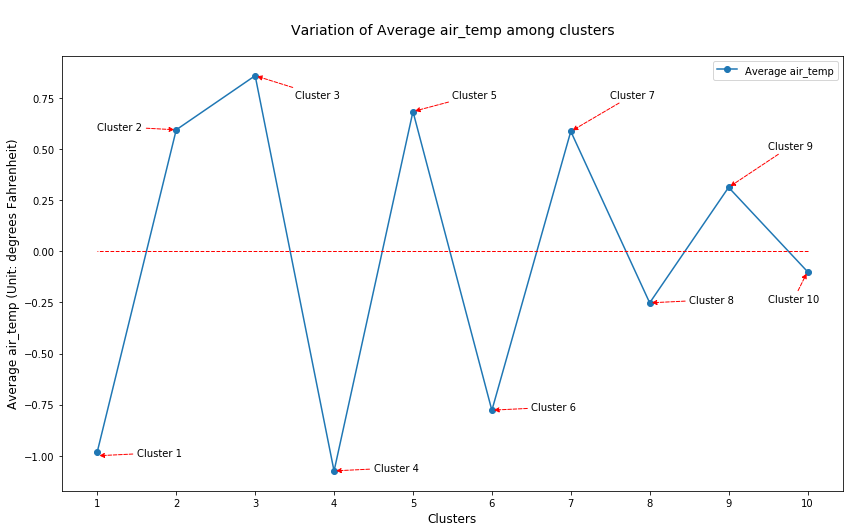

In [95]:
plt.figure(figsize=(14,8))
plt.plot(range(1,11),(tot.groupby(['y_kmeans'])['air_temp'].mean()),label='Average air_temp',marker='o')
plt.plot([10, 1], [0, 0], color='r', lw=1, linestyle='--')
plt.title('\nVariation of Average air_temp among clusters\n',fontsize=14)
plt.xlabel('Clusters',fontsize=12)
plt.ylabel('Average air_temp (Unit: degrees Fahrenheit)',fontsize=12)
plt.annotate("Cluster 1",fontsize=10,xy=(1,-1),xytext=(1.5, -1), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 2",fontsize=10,xy=(2,0.5946),xytext=(1, 0.5946), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 3",fontsize=10,xy=(3,0.8593),xytext=(3.5, 0.75), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 4",fontsize=10,xy=(4,-1.074),xytext=(4.5, -1.074), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 5",fontsize=10,xy=(5,0.6841),xytext=(5.5, 0.75), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 6",fontsize=10,xy=(6,-0.777),xytext=(6.5, -0.777), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 7",fontsize=10,xy=(7,0.5870),xytext=(7.5, 0.75), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 8",fontsize=10,xy=(8,-0.2519),xytext=(8.5, -0.2519), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 9",fontsize=10,xy=(9, 0.31303),xytext=(9.5, 0.50), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.annotate("Cluster 10",fontsize=10,xy=(10,-0.099354),xytext=(9.5,-0.25), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=1))
plt.xticks(np.arange(1,11,1));
plt.legend(loc='upper right')
plt.show()